# 0.0 Imports

In [45]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns
import matplotlib.pyplot as plt

# 0.1 Loading Data

In [15]:
df_raw = pd.read_csv('dataset/df_ready.csv')

# 1.0 Data Description

In [16]:
df = df_raw.copy()

## 1.1 Rename Columns

In [32]:
cols_old = ['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
            'name', 'price', 'disc_price', 'merchant', 'condition',
            'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
            'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
            'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
            'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1', 'price_std']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

In [34]:
cols_name = ['date_imp', 'category_name','name', 'price', 'disc_price', 'merchant',
             'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
             'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n', 
             'month', 'month_n', 'day', 'week_number']

df = df[cols_name]

## 1.2 Data Dimensions

In [35]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 23151
Number of Cols: 20


## 1.3 Data Types

In [29]:
df.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [37]:
df.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [38]:
df['date_imp'] = pd.to_datetime( df['date_imp'])

## 1.6 Descriptive Statistics 

In [39]:
num_attributes = df.select_dtypes( include=['float64', 'int64'])
cat_attributes = df.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

### 1.6.1 Nummerical Attributes

In [41]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # variação entre o mínimo e máximo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']

# 2.0 EDA

In [42]:
df2 = df.copy()

## 2.1 Questões de Negócio

- Qual foi a loja que mais vendeu?
- Qual a categoria mais vendida?
- Qual a marca mais vendida?
- Quais os dias mais vendem?
- Quais os meses que mais vendem?
- Quais as semanas que mais vendem?

### 2.1.1 Qual foi a loja que mais vendeu?

<Axes: xlabel='merchant', ylabel='date_imp'>

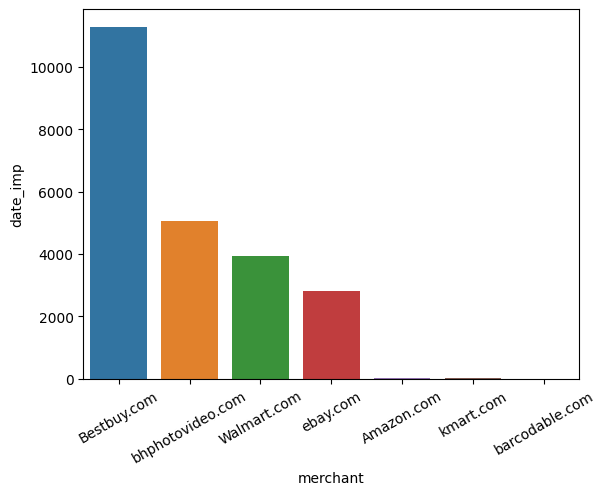

In [46]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp', data=aux1)

In [49]:
# seleção das lojas 
df_best    = df2[df2['merchant']== 'Bestbuy.com']
df_bhp     = df2[df2['merchant']== 'bhphotovideo.com']
df_walmart = df2[df2['merchant']== 'Walmart.com']
df_ebay    = df2[df2['merchant']== 'ebay.com']

### 2.1.2 Qual foi a categoria mais vendida no geral?

<Axes: xlabel='category_name', ylabel='date_imp'>

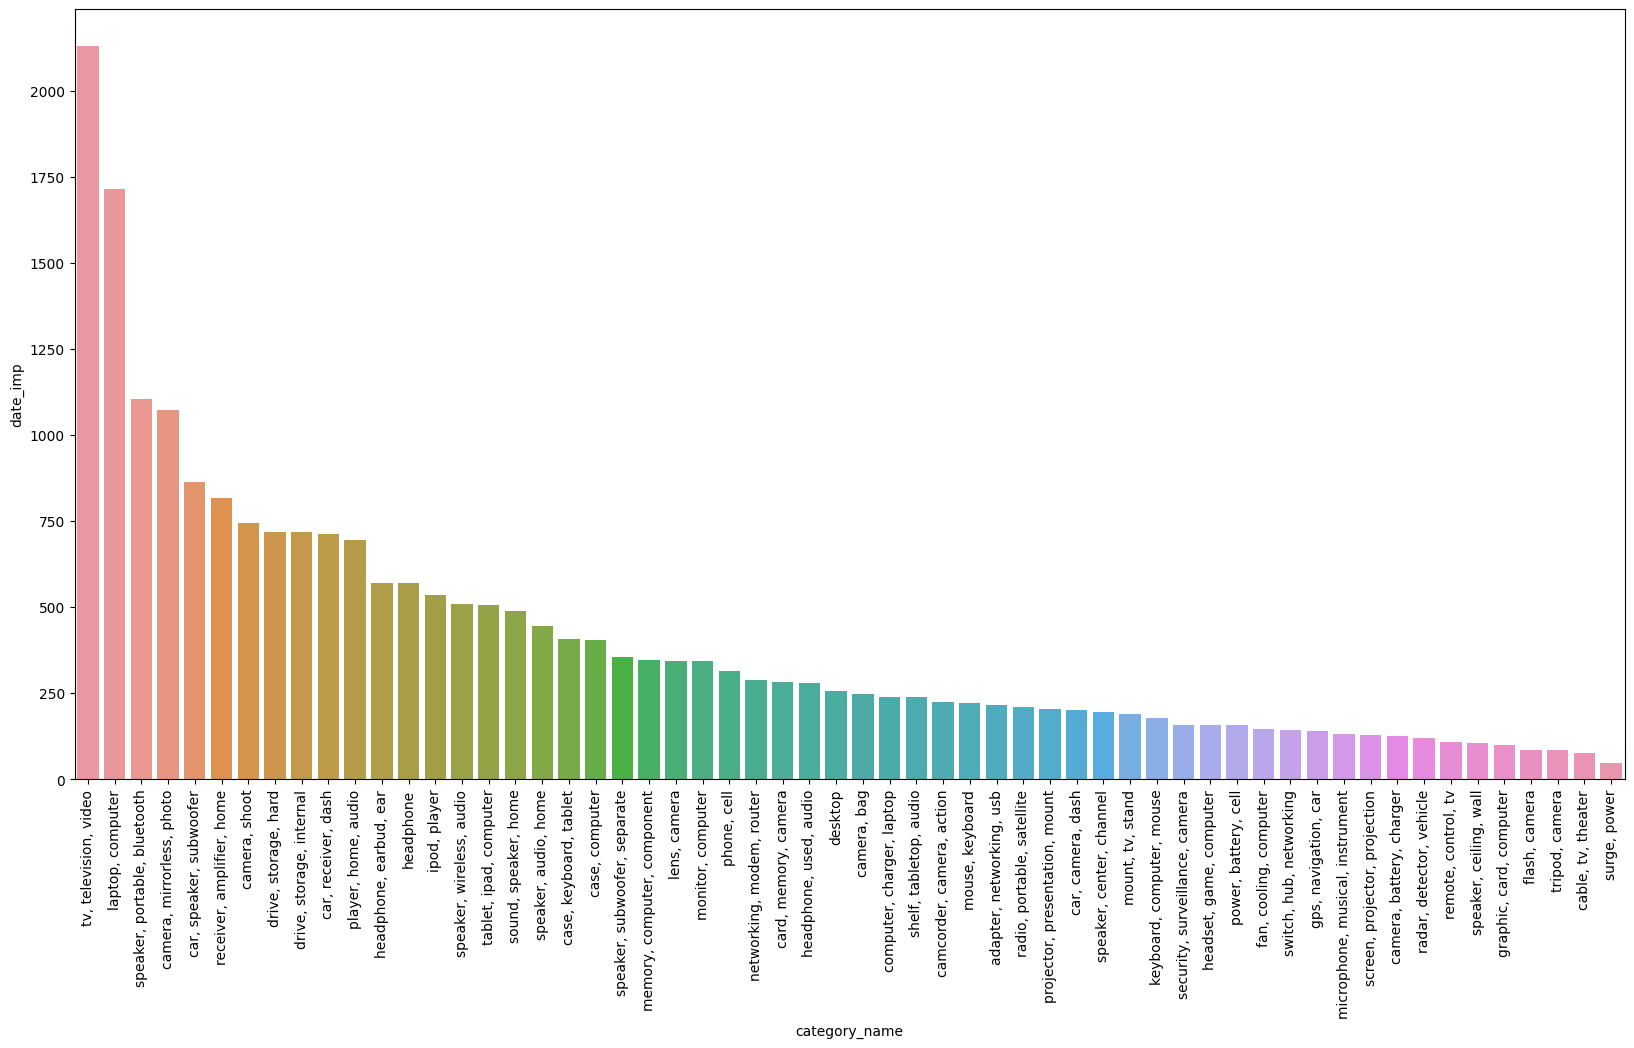

In [53]:
plt.figure(figsize=(20,10))
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)

### 2.1.3 Qual a categoria mais vendida por loja?

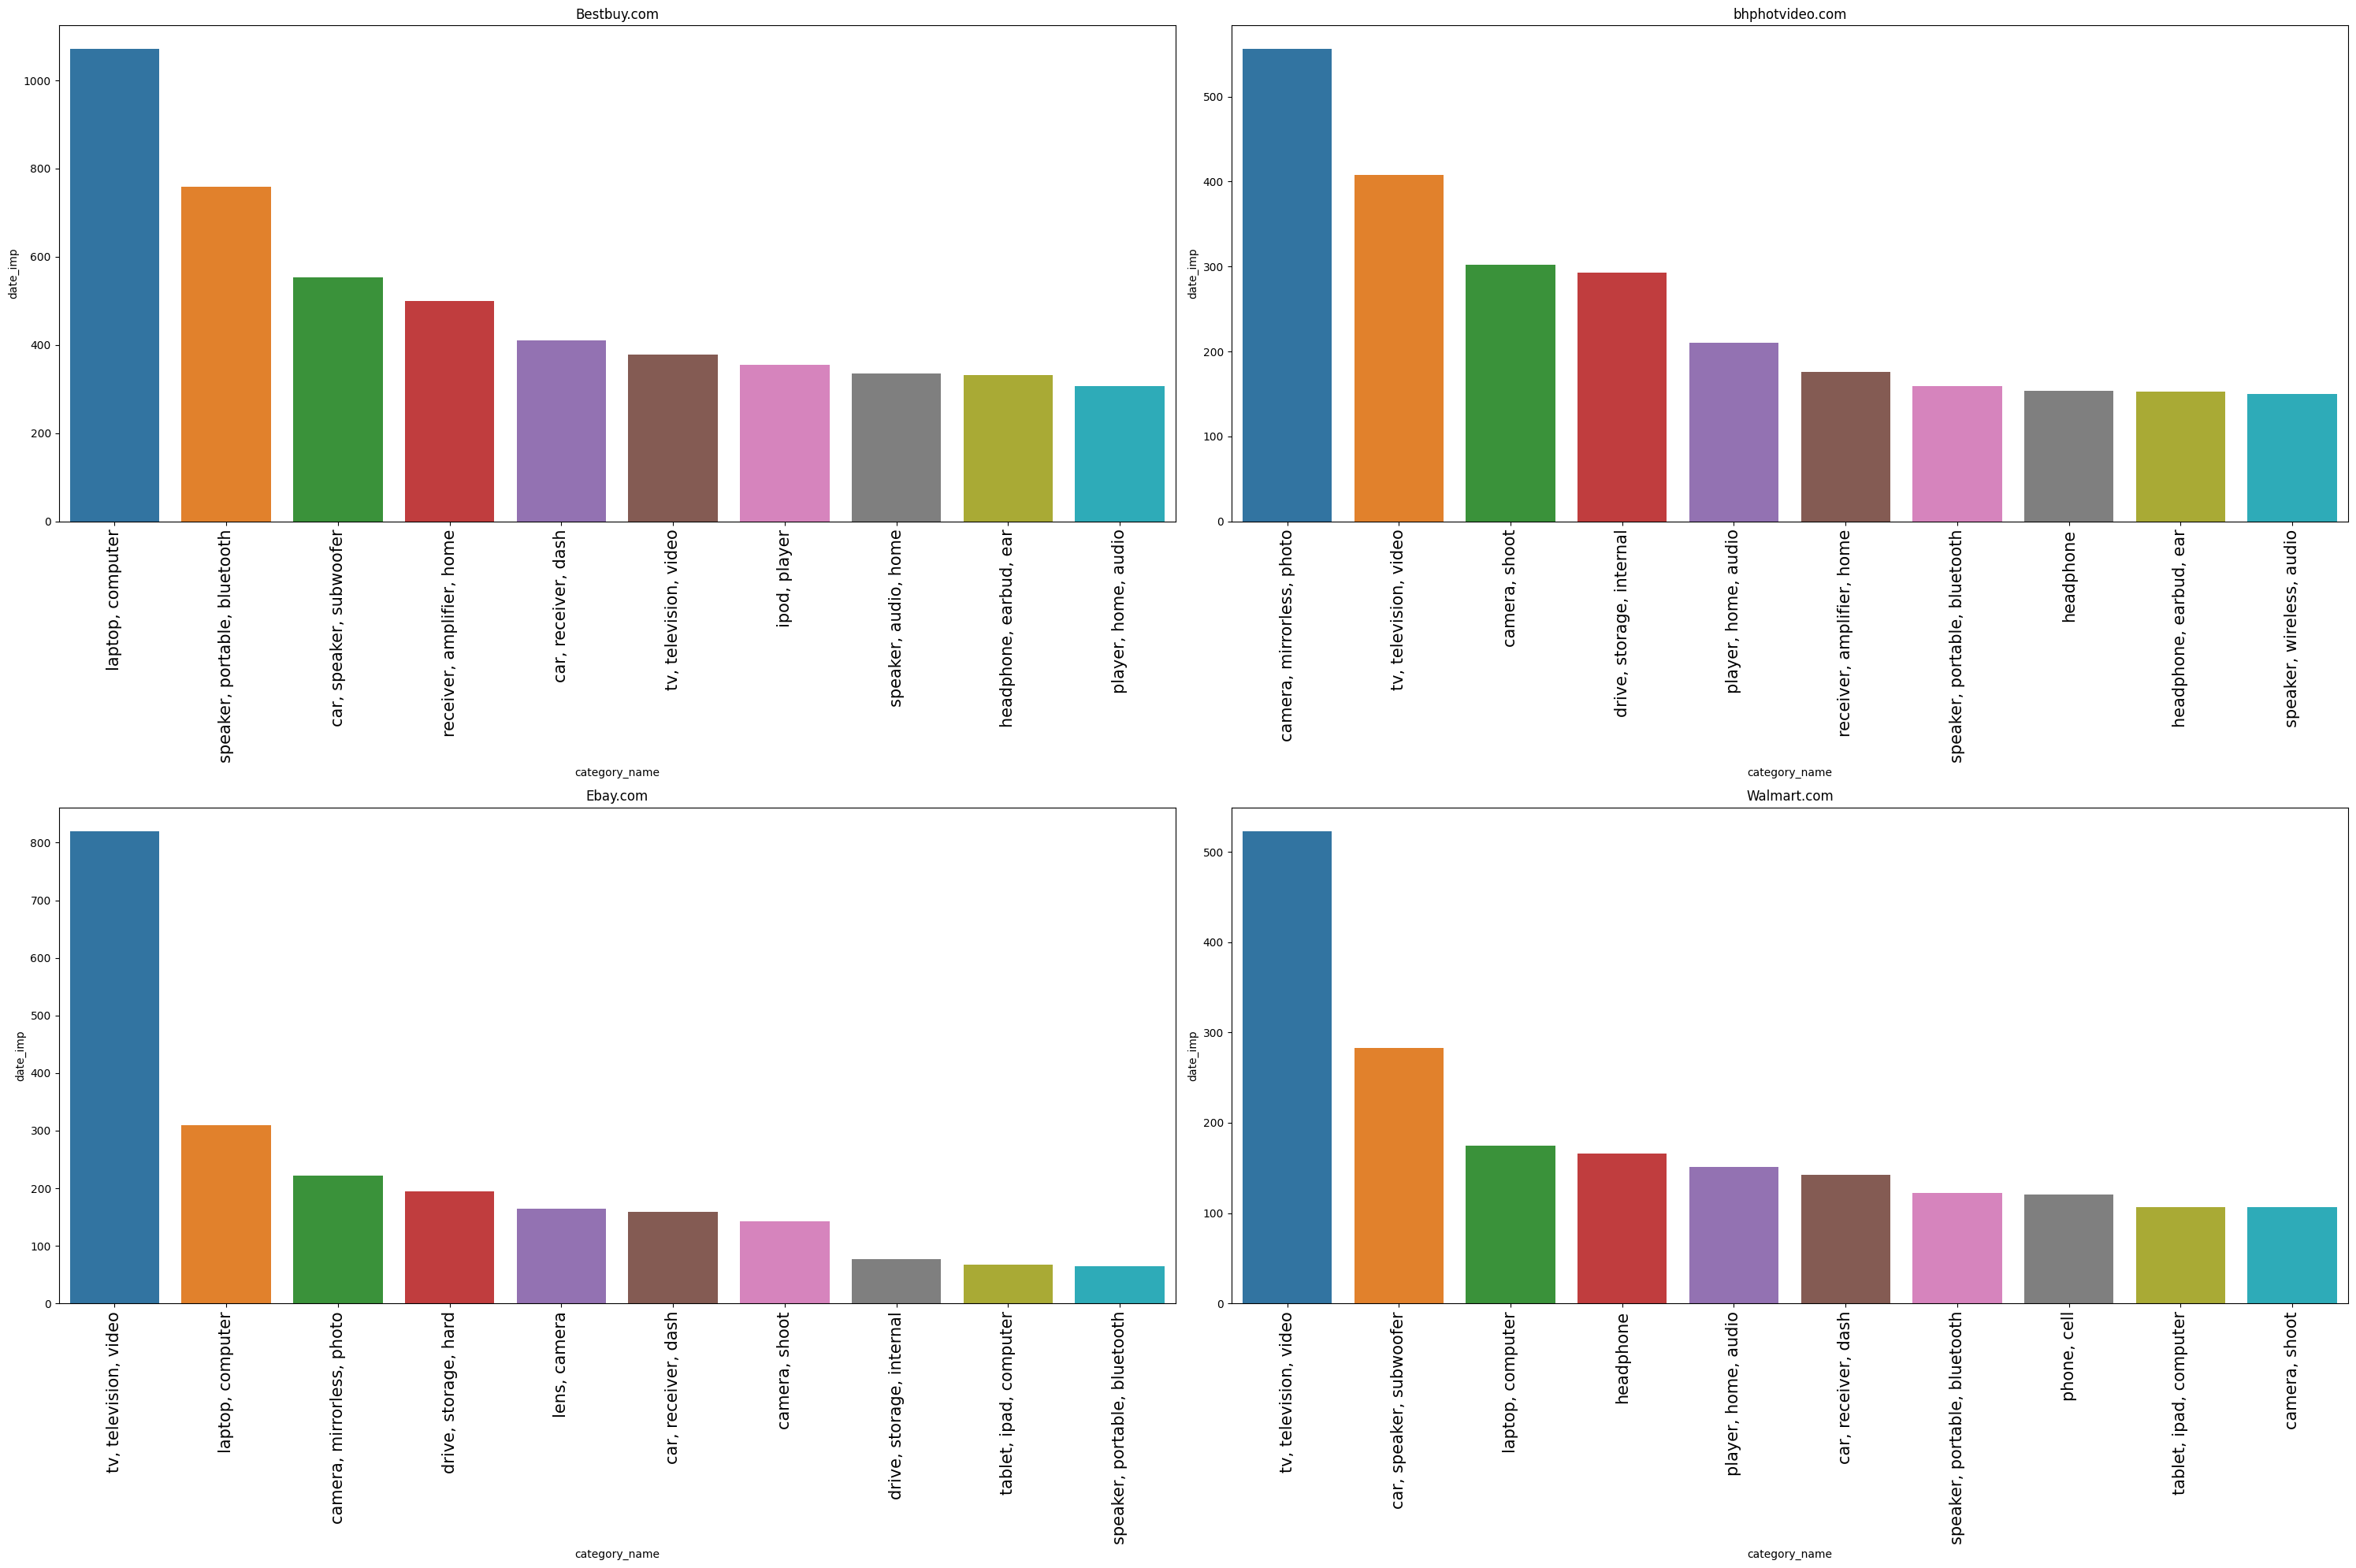

In [56]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3.head(10))

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('bhphotvideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4.head(10))

plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5.head(10))

plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=15)
plt.title('Walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6.head(10))

plt.tight_layout()